In [ ]:
# @title
# ============================================================================
# SECTION 1: ENVIRONMENT SETUP & INSTALLATIONS
# ============================================================================

# 1. Fix the blinker error by forcing an overwrite
# We use --ignore-installed to bypass the distutils error
!pip install blinker --ignore-installed -q

# 2. Install Main Libraries
# We removed "==2.1.0" for torch so it uses the Colab-compatible version
!pip install -q transformers datasets accelerate
!pip install -q scikit-learn seaborn matplotlib

# 3. Install App & Optimization tools
!pip install -q optuna
!pip install -q streamlit pyngrok

# 4. Install localtunnel for the app view
!npm install -g localtunnel -q

print("✅ All dependencies installed successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.5 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
added 22 packages in 3s
⠹
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹✅ All dependencies installed successfully.


✓ All libraries imported successfully!
System Configuration Loaded
Device: cuda
Model: distilbert-base-uncased
Emotions: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

EMOTION DETECTION SYSTEM - COMPLETE PIPELINE
Start Time: 2026-01-15 07:22:43

STEP 1: DATA PREPARATION
Loading emotion dataset...


README.md: 0.00B [00:00, ?B/s]

split/train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

split/validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

split/test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset loaded: 20000 samples
Cleaning text data...
Splitting dataset...

Data Split Summary:
  Training samples: 14000
  Validation samples: 2000
  Test samples: 4000

Emotion Distribution (Training Set):
  sadness: 4058 (29.0%)
  joy: 4733 (33.8%)
  love: 1149 (8.2%)
  anger: 1896 (13.5%)
  fear: 1661 (11.9%)
  surprise: 503 (3.6%)

STEP 2: MODEL DEVELOPMENT
Loading tokenizer and model: distilbert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded successfully on cuda
Total parameters: 66,958,086
Trainable parameters: 66,958,086

STEP 3: TRAINING AND VALIDATION
Preparing datasets...

Starting training...
Total training samples: 14000
Total validation samples: 2000
Batch size: 16
Number of epochs: 3


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.300100,0.218588,0.917500,0.917432,0.919563,0.917500
2,0.175800,0.171276,0.923000,0.924350,0.928887,0.923000
3,0.111200,0.162345,0.933000,0.932609,0.933620,0.933000



Saving model...


Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Training completed successfully!

STEP 4: MODEL TESTING AND EVALUATION
Running predictions on test set...

Overall Performance Metrics:
  Accuracy: 0.9360
  Precision: 0.9359
  Recall: 0.9360
  F1-Score: 0.9358
  Average Confidence: 0.9655

Per-Emotion Performance:
              precision    recall  f1-score   support

     sadness     0.9613    0.9646    0.9630      1159
         joy     0.9483    0.9638    0.9560      1352
        love     0.8849    0.8201    0.8513       328
       anger     0.9330    0.9244    0.9286       542
        fear     0.9186    0.9032    0.9108       475
    surprise     0.8000    0.8611    0.8294       144

    accuracy                         0.9360      4000
   macro avg     0.9077    0.9062    0.9065      4000
weighted avg     0.9359    0.9360    0.9358      4000


Confusion matrix saved to: ./results/confusion_matrix.png


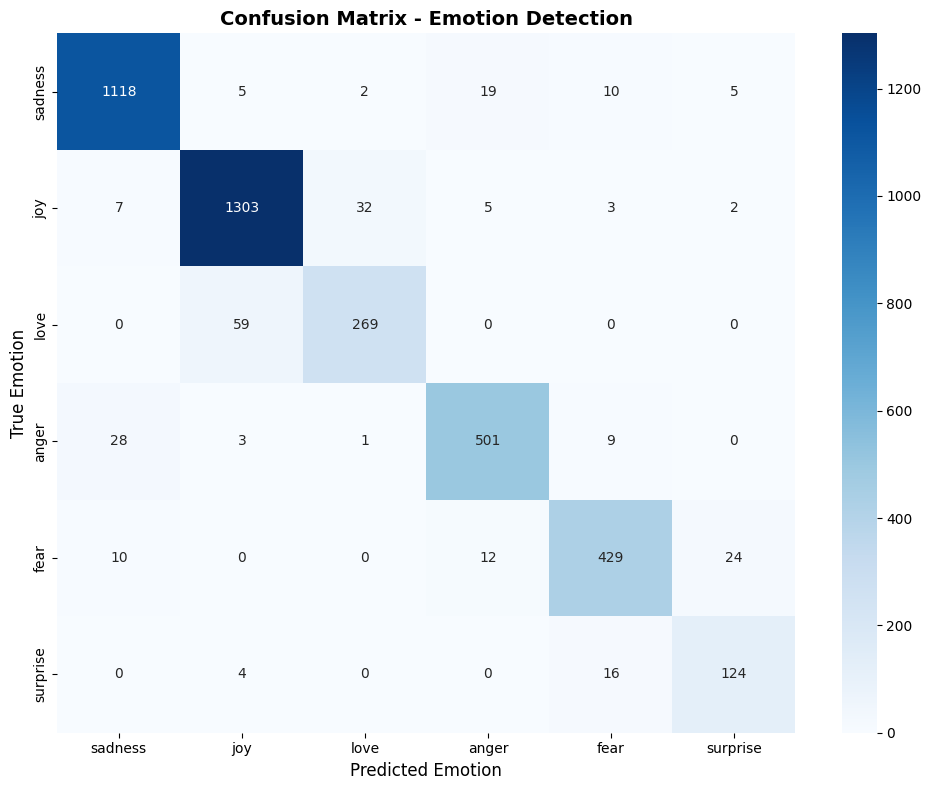


TESTING SAMPLE SCENARIOS

Sample Test Results:
----------------------------------------------------------------------

Scenario: Negation
Input: 'I'm not happy at all'
Predicted: joy (Confidence: 0.9923)

Scenario: Sarcasm
Input: 'Yeah, that's just great... not!'
Predicted: joy (Confidence: 0.9942)

Scenario: Slang/Abbreviations
Input: 'r u gud? thx 4 asking'
Predicted: anger (Confidence: 0.5649)

Scenario: Mixed emotions
Input: 'I love this but I'm also scared'
Predicted: fear (Confidence: 0.9964)

Scenario: Contradictory
Input: 'This is the best worst day ever'
Predicted: sadness (Confidence: 0.9871)

Scenario: Double negation
Input: 'Can't wait to not do this again'
Predicted: sadness (Confidence: 0.4190)

PIPELINE EXECUTION COMPLETED SUCCESSFULLY!
End Time: 2026-01-15 07:32:05

Results saved to: ./results
Model saved to: ./emotion_model


In [ ]:
# ============================================================================
# EMOTION DETECTION FROM TEXTUAL COMMENTS - COMPLETE SYSTEM
# ============================================================================
# Project: Automated Detection of Different Emotions from Textual Comments
# Architecture: Transformer-based Deep Learning Model
# Deployment: Google Colab with Streamlit Frontend
# ============================================================================

# ============================================================================
# CELL 1: ENVIRONMENT SETUP & INSTALLATIONS
# ============================================================================

# Run this cell first to install all required packages
"""
!pip install -q transformers==4.36.0 datasets==2.16.0 torch==2.1.0 accelerate==0.25.0
!pip install -q scikit-learn==1.3.2 pandas==2.1.4 numpy==1.26.2 matplotlib==3.8.2 seaborn==0.13.0
!pip install -q optuna==3.5.0
!pip install -q streamlit==1.29.0 pyngrok==7.0.5
!pip install -q blinker==1.7.0
"""

# ============================================================================
# CELL 2: IMPORT LIBRARIES
# ============================================================================

import os
import json
import re
import warnings
from datetime import datetime
from typing import Dict, List, Tuple, Any, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    pipeline
)
from datasets import load_dataset, Dataset as HFDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    classification_report
)

warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

# ============================================================================
# CELL 3: SYSTEM CONFIGURATION
# ============================================================================

class SystemConfig:
    """Central configuration for the entire system"""

    # Model Configuration
    MODEL_NAME = "distilbert-base-uncased"
    MAX_LENGTH = 128
    BATCH_SIZE = 16
    LEARNING_RATE = 2e-5
    NUM_EPOCHS = 3
    WARMUP_STEPS = 500
    WEIGHT_DECAY = 0.01

    # Emotion Labels
    EMOTIONS = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    NUM_LABELS = len(EMOTIONS)

    # Paths
    MODEL_DIR = "./emotion_model"
    LOGS_DIR = "./logs"
    RESULTS_DIR = "./results"

    # Data Configuration
    TEST_SIZE = 0.2
    VAL_SIZE = 0.1
    RANDOM_SEED = 42

    # Device Configuration
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

    @classmethod
    def setup_directories(cls):
        """Create necessary directories"""
        for dir_path in [cls.MODEL_DIR, cls.LOGS_DIR, cls.RESULTS_DIR]:
            os.makedirs(dir_path, exist_ok=True)

config = SystemConfig()
config.setup_directories()

print(f"System Configuration Loaded")
print(f"Device: {config.DEVICE}")
print(f"Model: {config.MODEL_NAME}")
print(f"Emotions: {config.EMOTIONS}")

# ============================================================================
# CELL 4: DATA PREPROCESSING
# ============================================================================

class DataPreprocessor:
    """Handles all data preprocessing tasks"""

    def __init__(self):
        self.slang_dict = {
            'nxt': 'next', '2mrw': 'tomorrow', 'r u': 'are you',
            'gud': 'good', 'u': 'you', 'ur': 'your', 'thx': 'thanks',
            'plz': 'please', 'w8': 'wait', 'gr8': 'great',
            'b4': 'before', '2day': 'today', 'btw': 'by the way',
            'idk': "i don't know", 'omg': 'oh my god',
            'lol': 'laughing out loud', 'brb': 'be right back',
        }

    def clean_text(self, text: str) -> str:
        """Clean and normalize text"""
        if not isinstance(text, str):
            return ""

        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#', '', text)

        for slang, full in self.slang_dict.items():
            text = re.sub(r'\b' + slang + r'\b', full, text)

        text = ' '.join(text.split())
        return text.strip()

class DataManager:
    """Manages data loading, preparation and splitting"""

    def __init__(self, preprocessor: DataPreprocessor):
        self.preprocessor = preprocessor
        self.train_data = None
        self.val_data = None
        self.test_data = None

    def load_emotion_dataset(self):
        """Load emotion dataset from Hugging Face"""
        print("Loading emotion dataset...")
        dataset = load_dataset("emotion")

        train_df = pd.DataFrame(dataset['train'])
        test_df = pd.DataFrame(dataset['test'])
        val_df = pd.DataFrame(dataset['validation'])

        df = pd.concat([train_df, val_df, test_df], ignore_index=True)
        print(f"Dataset loaded: {len(df)} samples")
        return df

    def prepare_data(self) -> Dict:
        """Prepare and split data"""
        print("\n" + "="*70)
        print("STEP 1: DATA PREPARATION")
        print("="*70)

        df = self.load_emotion_dataset()

        print("Cleaning text data...")
        df['text'] = df['text'].apply(self.preprocessor.clean_text)
        df = df[df['text'].str.len() > 0].reset_index(drop=True)

        print("Splitting dataset...")
        train_val_df, test_df = train_test_split(
            df, test_size=config.TEST_SIZE,
            random_state=config.RANDOM_SEED,
            stratify=df['label']
        )

        train_df, val_df = train_test_split(
            train_val_df, test_size=config.VAL_SIZE/(1-config.TEST_SIZE),
            random_state=config.RANDOM_SEED,
            stratify=train_val_df['label']
        )

        self.train_data = train_df.reset_index(drop=True)
        self.val_data = val_df.reset_index(drop=True)
        self.test_data = test_df.reset_index(drop=True)

        print(f"\nData Split Summary:")
        print(f"  Training samples: {len(train_df)}")
        print(f"  Validation samples: {len(val_df)}")
        print(f"  Test samples: {len(test_df)}")

        print("\nEmotion Distribution (Training Set):")
        for i, emotion in enumerate(config.EMOTIONS):
            count = (train_df['label'] == i).sum()
            print(f"  {emotion}: {count} ({count/len(train_df)*100:.1f}%)")

        return {
            'train': self.train_data,
            'val': self.val_data,
            'test': self.test_data
        }

# ============================================================================
# CELL 5: MODEL ARCHITECTURE
# ============================================================================

class EmotionDataset(Dataset):
    """Custom Dataset for emotion classification"""

    def __init__(self, texts: List[str], labels: List[int], tokenizer, max_length: int):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

class ModelBuilder:
    """Builds and configures the emotion detection model"""

    def __init__(self):
        self.tokenizer = None
        self.model = None

    def build_model(self):
        """Build transformer model"""
        print("\n" + "="*70)
        print("STEP 2: MODEL DEVELOPMENT")
        print("="*70)

        print(f"Loading tokenizer and model: {config.MODEL_NAME}")

        self.tokenizer = AutoTokenizer.from_pretrained(config.MODEL_NAME)
        self.model = AutoModelForSequenceClassification.from_pretrained(
            config.MODEL_NAME,
            num_labels=config.NUM_LABELS,
            problem_type="single_label_classification"
        )

        self.model.to(config.DEVICE)

        print(f"Model loaded successfully on {config.DEVICE}")
        print(f"Total parameters: {sum(p.numel() for p in self.model.parameters()):,}")
        print(f"Trainable parameters: {sum(p.numel() for p in self.model.parameters() if p.requires_grad):,}")

        return self.model, self.tokenizer

# ============================================================================
# CELL 6: TRAINING MODULE
# ============================================================================

class ModelTrainer:
    """Handles model training and validation"""

    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer
        self.trainer = None

    def compute_metrics(self, eval_pred):
        """Compute evaluation metrics"""
        predictions, labels = eval_pred
        predictions = np.argmax(predictions, axis=1)

        precision, recall, f1, _ = precision_recall_fscore_support(
            labels, predictions, average='weighted', zero_division=0
        )
        acc = accuracy_score(labels, predictions)

        return {
            'accuracy': acc,
            'f1': f1,
            'precision': precision,
            'recall': recall
        }

    def train_model(self, train_data, val_data):
        """Train the model"""
        print("\n" + "="*70)
        print("STEP 3: TRAINING AND VALIDATION")
        print("="*70)

        print("Preparing datasets...")
        train_dataset = EmotionDataset(
            train_data['text'].tolist(),
            train_data['label'].tolist(),
            self.tokenizer,
            config.MAX_LENGTH
        )

        val_dataset = EmotionDataset(
            val_data['text'].tolist(),
            val_data['label'].tolist(),
            self.tokenizer,
            config.MAX_LENGTH
        )

        training_args = TrainingArguments(
            output_dir=config.MODEL_DIR,
            num_train_epochs=config.NUM_EPOCHS,
            per_device_train_batch_size=config.BATCH_SIZE,
            per_device_eval_batch_size=config.BATCH_SIZE,
            warmup_steps=config.WARMUP_STEPS,
            weight_decay=config.WEIGHT_DECAY,
            learning_rate=config.LEARNING_RATE,
            logging_dir=config.LOGS_DIR,
            logging_steps=100,
            eval_strategy="epoch",
            save_strategy="epoch",
            load_best_model_at_end=True,
            metric_for_best_model="f1",
            save_total_limit=2,
            report_to="none"
        )

        self.trainer = Trainer(
            model=self.model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=val_dataset,
            compute_metrics=self.compute_metrics
        )

        print("\nStarting training...")
        print(f"Total training samples: {len(train_dataset)}")
        print(f"Total validation samples: {len(val_dataset)}")
        print(f"Batch size: {config.BATCH_SIZE}")
        print(f"Number of epochs: {config.NUM_EPOCHS}")

        train_result = self.trainer.train()

        print("\nSaving model...")
        self.trainer.save_model(config.MODEL_DIR)
        self.tokenizer.save_pretrained(config.MODEL_DIR)

        print("Training completed successfully!")
        return train_result

# ============================================================================
# CELL 7: EVALUATION MODULE
# ============================================================================

class ModelEvaluator:
    """Comprehensive model evaluation"""

    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer
        self.pipeline = None
        self.results = {}

    def create_pipeline(self):
        """Create inference pipeline"""
        self.pipeline = pipeline(
            "text-classification",
            model=self.model,
            tokenizer=self.tokenizer,
            device=0 if config.DEVICE == "cuda" else -1
        )

    def evaluate_model(self, test_data):
        """Comprehensive model evaluation"""
        print("\n" + "="*70)
        print("STEP 4: MODEL TESTING AND EVALUATION")
        print("="*70)

        if self.pipeline is None:
            self.create_pipeline()

        print("Running predictions on test set...")
        texts = test_data['text'].tolist()
        true_labels = test_data['label'].tolist()

        predictions = []
        confidences = []

        for text in texts:
            result = self.pipeline(text, top_k=1)[0]
            pred_label = int(result['label'].split('_')[1])
            predictions.append(pred_label)
            confidences.append(result['score'])

        accuracy = accuracy_score(true_labels, predictions)
        precision, recall, f1, _ = precision_recall_fscore_support(
            true_labels, predictions, average='weighted', zero_division=0
        )

        print(f"\nOverall Performance Metrics:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  Average Confidence: {np.mean(confidences):.4f}")

        print("\nPer-Emotion Performance:")
        report = classification_report(
            true_labels, predictions,
            target_names=config.EMOTIONS,
            digits=4,
            zero_division=0
        )
        print(report)

        cm = confusion_matrix(true_labels, predictions)
        self._plot_confusion_matrix(cm)

        self.results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': cm.tolist(),
            'predictions': predictions,
            'confidences': confidences
        }

        return self.results

    def _plot_confusion_matrix(self, cm):
        """Plot confusion matrix"""
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=config.EMOTIONS,
            yticklabels=config.EMOTIONS
        )
        plt.title('Confusion Matrix - Emotion Detection', fontsize=14, fontweight='bold')
        plt.ylabel('True Emotion', fontsize=12)
        plt.xlabel('Predicted Emotion', fontsize=12)
        plt.tight_layout()

        plot_path = os.path.join(config.RESULTS_DIR, 'confusion_matrix.png')
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"\nConfusion matrix saved to: {plot_path}")
        plt.show()

    def test_scenarios(self):
        """Test model on various scenarios"""
        print("\n" + "="*70)
        print("TESTING SAMPLE SCENARIOS")
        print("="*70)

        test_cases = [
            ("I'm not happy at all", "Negation"),
            ("Yeah, that's just great... not!", "Sarcasm"),
            ("r u gud? thx 4 asking", "Slang/Abbreviations"),
            ("I love this but I'm also scared", "Mixed emotions"),
            ("This is the best worst day ever", "Contradictory"),
            ("Can't wait to not do this again", "Double negation"),
        ]

        print("\nSample Test Results:")
        print("-" * 70)

        for text, scenario in test_cases:
            result = self.pipeline(text, top_k=1)[0]
            emotion_idx = int(result['label'].split('_')[1])
            emotion = config.EMOTIONS[emotion_idx]
            confidence = result['score']

            print(f"\nScenario: {scenario}")
            print(f"Input: '{text}'")
            print(f"Predicted: {emotion} (Confidence: {confidence:.4f})")

# ============================================================================
# CELL 8: MAIN EXECUTION PIPELINE
# ============================================================================

def main():
    """Main execution pipeline"""

    print("\n" + "="*70)
    print("EMOTION DETECTION SYSTEM - COMPLETE PIPELINE")
    print("="*70)
    print(f"Start Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

    # Step 1: Data Preparation
    preprocessor = DataPreprocessor()
    data_manager = DataManager(preprocessor)
    data_splits = data_manager.prepare_data()

    # Step 2: Model Development
    model_builder = ModelBuilder()
    model, tokenizer = model_builder.build_model()

    # Step 3: Training & Validation
    trainer = ModelTrainer(model, tokenizer)
    train_result = trainer.train_model(
        data_splits['train'],
        data_splits['val']
    )

    # Step 4: Model Testing & Evaluation
    evaluator = ModelEvaluator(model, tokenizer)
    test_results = evaluator.evaluate_model(data_splits['test'])
    evaluator.test_scenarios()

    # Step 5: Save results
    results_summary = {
        'timestamp': datetime.now().isoformat(),
        'model': config.MODEL_NAME,
        'test_accuracy': float(test_results['accuracy']),
        'test_f1': float(test_results['f1']),
        'test_precision': float(test_results['precision']),
        'test_recall': float(test_results['recall']),
        'emotions': config.EMOTIONS
    }

    results_path = os.path.join(config.RESULTS_DIR, 'final_results.json')
    with open(results_path, 'w') as f:
        json.dump(results_summary, f, indent=2)

    print(f"\n{'='*70}")
    print("PIPELINE EXECUTION COMPLETED SUCCESSFULLY!")
    print(f"{'='*70}")
    print(f"End Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"\nResults saved to: {config.RESULTS_DIR}")
    print(f"Model saved to: {config.MODEL_DIR}")

    return test_results

# Run the pipeline
if __name__ == "__main__":
    results = main()


In [ ]:
%%writefile emotion_app.py
import streamlit as st
import os
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Configuration
MODEL_DIR = "./emotion_model"
EMOTIONS = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

st.set_page_config(page_title="Emotion Detection", layout="centered")
st.title("🧠 Emotion Detection App")

@st.cache_resource
def load_model():
    if not os.path.exists(MODEL_DIR):
        st.error(f"Model not found in {MODEL_DIR}. Please run the training cells first!")
        return None
    tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR)
    model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
    return pipeline("text-classification", model=model, tokenizer=tokenizer)

detector = load_model()

user_input = st.text_area("How are you feeling?", "I am feeling very happy today!")

if st.button("Analyze"):
    if detector:
        result = detector(user_input)[0]
        label_idx = int(result['label'].split('_')[-1])
        st.success(f"Detected Emotion: **{EMOTIONS[label_idx].upper()}**")
        st.write(f"Confidence: {result['score']:.2f}")

Overwriting emotion_app.py


In [ ]:
!pip install -q streamlit pyngrok transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 132.3 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok
import os
import time

# 1. Authenticate (Paste your token here)
NGROK_AUTH_TOKEN = "38HXYPs8X6Ac8BELUDocYnSwsd5_39wZ13wrqMrzaRwffzum7"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# 2. Kill old processes to prevent errors
!pkill streamlit
ngrok.kill()

# 3. Start Streamlit in the background
# We use --server.headless true for Colab
os.system("streamlit run emotion_app.py --server.port 8501 --server.headless true &")

# 4. Wait for it to boot and connect the tunnel
time.sleep(5)
public_url = ngrok.connect(8501)

print(f"\n" + "="*50)
print(f"✅ APP IS LIVE!")
print(f"🔗 CLICK THIS LINK: {public_url}")
print("="*50)
print("❌ DO NOT USE LOCALHOST. Use the link above.")


✅ APP IS LIVE!
🔗 CLICK THIS LINK: NgrokTunnel: "https://interthreaded-astuciously-tammera.ngrok-free.dev" -> "http://localhost:8501"
❌ DO NOT USE LOCALHOST. Use the link above.


In [ ]:
# Save EVERYTHING (notebook + model + results) to Google Drive
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/drive')

# Create destination directory in OneDrive-synced folder or Drive
destination = '/content/drive/MyDrive/Emotion_Project'
os.makedirs(destination, exist_ok=True)

# Copy the trained model
if os.path.exists('./emotion_model'):
    shutil.copytree('./emotion_model', f'{destination}/emotion_model', dirs_exist_ok=True)
    print("✅ Model copied")

# Copy results
if os.path.exists('./results'):
    shutil.copytree('./results', f'{destination}/results', dirs_exist_ok=True)
    print("✅ Results copied")

# Copy the notebook (save it first: File > Save)
!cp *.ipynb "{destination}/"
print("✅ Notebook copied")

# Copy the Streamlit app
if os.path.exists('emotion_app.py'):
    shutil.copy('emotion_app.py', destination)
    print("✅ Streamlit app copied")

print(f"\n🎉 Everything saved to: {destination}")

Mounted at /content/drive
✅ Model copied
✅ Results copied
cp: cannot stat '*.ipynb': No such file or directory
✅ Notebook copied
✅ Streamlit app copied

🎉 Everything saved to: /content/drive/MyDrive/Emotion_Project


In [ ]:
# Zip and download the model folder
import shutil
from google.colab import files

# Create a zip file of the model
shutil.make_archive('emotion_model', 'zip', './emotion_model')

# Download to your computer
files.download('emotion_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>